In [1]:
# All credit goes to Tom G.
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
sample = pd.read_csv('../assets/sampleSubmission.csv')
weather = pd.read_csv('../assets/weather.csv')

In [3]:
# Get labels
labels = train.WnvPresent.values

In [4]:
# Not using codesum for this benchmark
weather = weather.drop('CodeSum', axis=1)

In [5]:
# Split station 1 and 2 and join horizontally
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [6]:
# replace some missing values and T with -1
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [7]:
# Functions to extract month and day from dataset
# You can also use parse_dates of Pandas.
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

def create_year(x):
    return x.split('-')[0]

In [8]:
train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
train['year'] = train.Date.apply(create_year)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)
test['year'] = test.Date.apply(create_year)


# Add integer latitude/longitude columns
train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

In [9]:
# Merge with weather data
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')

train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)


In [10]:
# Convert categorical data to numbers
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

In [11]:
lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

In [12]:
lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

In [13]:
(train != -1).any(axis=0).head()

Address    True
Species    True
Block      True
Street     True
Trap       True
dtype: bool

In [14]:
# drop columns with -1s
train = train.loc[:,(train != -1).any(axis=0)]
test = test.loc[:,(test != -1).any(axis=0)]

In [15]:
#test train split the train off of date, multiple years' input as train and test is the last year (2013?)
#How can I test the values I get back? the labels!
mask = train['year']=='2013'
X_test = train[mask]
X_train = train[~mask]


In [16]:
X_test['year'].unique()

array(['2013'], dtype=object)

In [17]:
X_train['year'].unique()

array(['2007', '2009', '2011'], dtype=object)

In [18]:
labels_train = X_train.WnvPresent.values
labels_test = X_test.WnvPresent.values

In [19]:
# drop address columns
train = train.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos', 'year'], axis = 1)
X_train = X_train.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos', 'year'], axis = 1)
X_test = X_test.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos', 'year'], axis = 1)

test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

In [20]:
# Random Forest Classifier 
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=2)
clf.fit(X_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
clf.score(X_test, labels_test)

0.90008361204013376

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
preds = clf.predict(X_test)

In [34]:
preds.shape

(2392,)

In [40]:
test.dtypes

Species              int64
Block                int64
Street               int64
Trap                 int64
Latitude           float64
Longitude          float64
AddressAccuracy      int64
month               object
day                 object
year                object
Lat_int              int64
Long_int             int64
Tmax_x               int64
Tmin_x               int64
Tavg_x              object
Depart_x            object
DewPoint_x           int64
WetBulb_x           object
Heat_x              object
Cool_x              object
Sunrise_x           object
Sunset_x            object
Depth_x             object
SnowFall_x          object
PrecipTotal_x       object
StnPressure_x       object
SeaLevel_x          object
ResultSpeed_x      float64
ResultDir_x          int64
AvgSpeed_x          object
Tmax_y               int64
Tmin_y               int64
Tavg_y              object
DewPoint_y           int64
WetBulb_y           object
Heat_y              object
Cool_y              object
P

In [64]:
type(labels_test)

numpy.ndarray

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
preds = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:,1]

In [70]:
X_test.shape

(2392, 42)

In [71]:
preds.shape

(2392,)

In [72]:
pred_proba.shape

(2392,)

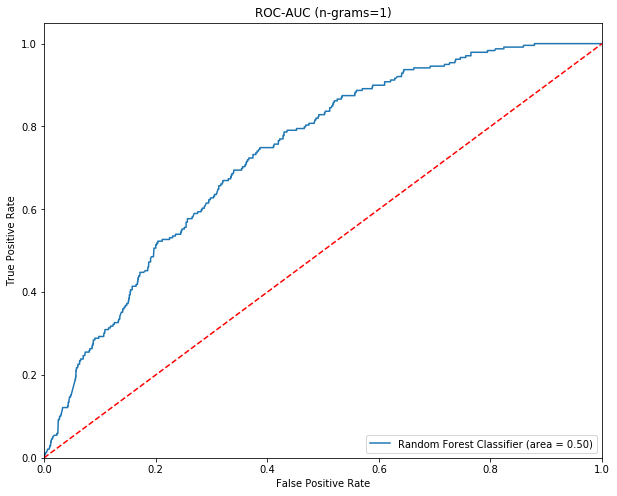

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve
preds = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(labels_test, preds)
FPR, TPR, thresholds = roc_curve(labels_test, pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(FPR, TPR, label='Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.title('ROC-AUC (n-grams=1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#These two cells are leftover from the guys code

# # Random Forest Classifier 
# clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=2)
# clf.fit(train, labels)

In [ ]:
# # create predictions and submission file
# predictions = clf.predict_proba(test)[:,1]
# sample['WnvPresent'] = predictions
# sample.to_csv('beat_the_benchmark.csv', index=False)

In [ ]:
list(zip(X_test.columns, clf.feature_importances_))